# Dummy Variables: Categorical variables cannot be directly put into the regression, unlike the Numeric Variables. 
Dummy refers to the imitation or copy or the substitute. Categorical variables are included in Regression model using a Dummy variable. 
The data we have contains 3 columns: 2 numeric [SAT and GPA] and 1 categorical [Attendence]
The categorical data column contains values: 'Yes' if the attendance > 75% and 'No' if its less. 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()              # This function helps us to override the default matplotlib style of plotting


# Load the data

In [39]:
# Load the data from a CSV file into a pandas data frame
df = pd.read_csv('Dummies.csv')
print(df)

# Observations:
# DV: GPA
# IV: SAT, Attendence
# Variable types:
#        Numeric  : SAT, GPA
#        Categoric: Attendance
# Strategy: Map the categorical data in terms of a dummy variable. 

     SAT   GPA Attendance
0   1714  2.40         No
1   1664  2.52         No
2   1760  2.54         No
3   1685  2.74         No
4   1693  2.83         No
5   1670  2.91         No
6   1764  3.00         No
7   1764  3.00         No
8   1792  3.01         No
9   1850  3.01         No
10  1735  3.02         No
11  1775  3.07         No
12  1735  3.08         No
13  1712  3.08         No
14  1773  3.12         No
15  1872  3.17        Yes
16  1755  3.17         No
17  1674  3.17        Yes
18  1842  3.17         No
19  1786  3.19        Yes
20  1761  3.19         No
21  1722  3.19         No
22  1663  3.20         No
23  1687  3.21         No
24  1974  3.24         No
25  1826  3.28         No
26  1787  3.28         No
27  1821  3.28         No
28  2020  3.28         No
29  1794  3.28         No
..   ...   ...        ...
54  1879  3.44        Yes
55  1887  3.47        Yes
56  1730  3.47        Yes
57  1953  3.47         No
58  1781  3.47        Yes
59  1891  3.48        Yes
60  1964  3.

# Map the data
Map all 'No' entries with 0(zero) and all 'Yes' entries with 1(One). 
Create a copy of the exisiting data frame and then implement the above mapping

In [40]:
df_new = df.copy()
print(id(df_new))       # 1884059734704
print(id(df))           # 1884059688296...Understand the way python's copy() works. 

# Fetch column names
print(df_new.columns)       # ['SAT', 'GPA', 'Attendance']

# Implement the mapping of categorical variable to dummy variable. 
df_new.Attendance = df_new.Attendance.map({'Yes':1, 'No':0})

# Print n confim
df_new.head()


1884070687464
1884070880200
Index(['SAT', 'GPA', 'Attendance'], dtype='object')


,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


# Generate Descriptive Statistics

In [41]:
df_new.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


# **Inference:**
1. Observe that the mean of the Attendance column is < 0.5 which indicates that there are more 0's than 1's i.e. more number of people have attendance less than 75%.

2. To be precise, only 46% of the students have attendance more than 75%. 


# Perform Regression
DV: GPA [of the student]
IV: SAT [Initial SAT score secured by the student] , Attendance

In [42]:
y = df_new.GPA                                      # DV
x1 = df_new[['SAT', 'Attendance']]                  # IV's

# We are using statsmodels for performing the multiple linear regression. By default it doesnt consider the constant term b0. 
# In case you wish to include it, use the add_constant() and add a new column 'const' which consists of only 1's. 
x = sm.add_constant(x1)                             # Adding a new column to make provision for inclusion of constant b0. 
print(x)

# Fit the model using OLS regression
results = sm.OLS(y,x).fit()

# Print the regression summary
results.summary()

    const   SAT  Attendance
0     1.0  1714           0
1     1.0  1664           0
2     1.0  1760           0
3     1.0  1685           0
4     1.0  1693           0
5     1.0  1670           0
6     1.0  1764           0
7     1.0  1764           0
8     1.0  1792           0
9     1.0  1850           0
10    1.0  1735           0
11    1.0  1775           0
12    1.0  1735           0
13    1.0  1712           0
14    1.0  1773           0
15    1.0  1872           1
16    1.0  1755           0
17    1.0  1674           1
18    1.0  1842           0
19    1.0  1786           1
20    1.0  1761           0
21    1.0  1722           0
22    1.0  1663           0
23    1.0  1687           0
24    1.0  1974           0
25    1.0  1826           0
26    1.0  1787           0
27    1.0  1821           0
28    1.0  2020           0
29    1.0  1794           0
..    ...   ...         ...
54    1.0  1879           1
55    1.0  1887           1
56    1.0  1730           1
57    1.0  1953     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 05 Jan 2019   Prob (F-statistic):           2.19e-15
Time:                        05:09:21   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Inference:
1. Observe the F-statistic:
F-test:
    H0: All beta's are 0 i.e. beta1 = beta2 = beta3 .....= betak = 0 i.e. None of the IV are statistically significant.  
    H1: Atleast one of the beta is non-zero.

In our case:
F-statistic:  52.70
Prob (F-statistic): 2.19e-15   .... (The p-value corresponding to this F-statistic). Here the p-value is very 
low..practically 0.000 which is less tha 0.05. Thus the OVERALL MODEL IS SIGNIFICANT. Overall model is significant. 

2. Observe the p-value's of the IV's viz...SAT (i.e. 0.000 < 0.05) and Attendance (i.e. 0.000 < 0.05). Thus both the IV's are significant. 

3. The adjusted R-squared of this model is 0.555, which is a good improvement from when we did not consider the Attendance attribute (0.392)


# Plot the regression line(s) on the scatter plot

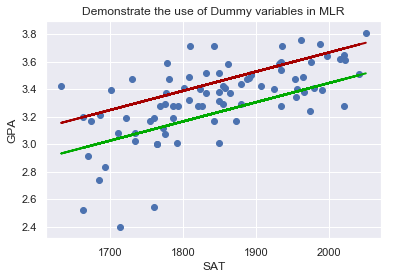

In [43]:
# Create a scatter plot of SAT [IV] and GPA [DV] 
plt.scatter(df_new.SAT, df_new.GPA)     

# There will be 2 regression equations depending upon the value of the 'Attendance' columnn (dummy) i.e. O(No) or 1(Yes)
# y_hat_no  = 0.6439 + 0.0014 * SAT + 0.2226 * 0 => 0.6439 + 0.0014 * SAT 
# y_hat_yes = 0.6439 + 0.0014 * SAT + 0.2226 * 1 => 0.8665 + 0.0014 * SAT
# Because of these 2 equations there will be 2 different regression lines overlayed on the scatter plot

y_hat_no = 0.6439 + 0.0014 * df_new.SAT             # All the corresponding values of y_hat are computed for given X i.e. SAT
y_hat_yes = 0.8665 + 0.0014 * df_new.SAT            # All the corresponding values of y_hat are computed for given X i.e. SAT

# Plot the 2 regression lines
fig = plt.plot(df_new['SAT'], y_hat_no, lw=2, c="#00AA01")
fig = plt.plot(df_new['SAT'], y_hat_yes, lw=2, c="#a50000")

# Label the plot
plt.title('Demonstrate the use of Dummy variables in MLR', fontsize=12)
plt.xlabel('SAT', fontsize=12)
plt.ylabel('GPA', fontsize=12)
plt.show()


# Inference:
1. Both the equations have the same slope but different intercepts. 
2. Red line == Regression line when students attended the classes [i.e. The Dummy variable value for Attendance = 1]
   Green line == Regression line when students did not attend the classes [i.e. The Dummy variable value for Attendance = 0]
   We observe that the GPA for students who attended the classes is more than the GPA for students who did not...which in a way 
   makes sense aswell. 
   Lets improve the above graph and spot the students who attended the classes and the one who did not. 
   

# Scatter Plot with differentiated data points.

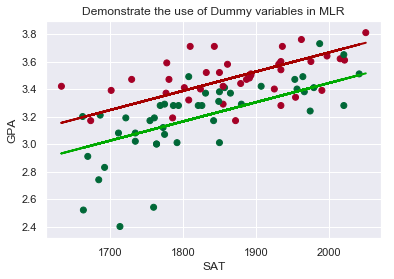

In [44]:
# Create a scatter plot of SAT [IV] and GPA [DV] 
plt.scatter(df_new.SAT, df_new.GPA, c = df_new.Attendance, cmap="RdYlGn_r")         # To plot points for different data's

# There will be 2 regression equations depending upon the value of the 'Attendance' columnn (dummy) i.e. O(No) or 1(Yes)
# y_hat_no  = 0.6439 + 0.0014 * SAT + 0.2226 * 0 => 0.6439 + 0.0014 * SAT 
# y_hat_yes = 0.6439 + 0.0014 * SAT + 0.2226 * 1 => 0.8665 + 0.0014 * SAT
# Because of these 2 equations there will be 2 different regression lines overlayed on the scatter plot

y_hat_no = 0.6439 + 0.0014 * df_new.SAT             # All the corresponding values of y_hat are computed for given X i.e. SAT
y_hat_yes = 0.8665 + 0.0014 * df_new.SAT            # All the corresponding values of y_hat are computed for given X i.e. SAT

# Plot the 2 regression lines
fig = plt.plot(df_new['SAT'], y_hat_no, lw=2, c="#00AA01")
fig = plt.plot(df_new['SAT'], y_hat_yes, lw=2, c="#a50000")

# Label the plot
plt.title('Demonstrate the use of Dummy variables in MLR', fontsize=12)
plt.xlabel('SAT', fontsize=12)
plt.ylabel('GPA', fontsize=12)
plt.show()
